# 概率、高斯和贝叶斯定理

In [38]:
%matplotlib inline

from lean import book_format
book_format.set_style()

## 一、介绍
上一章最后讨论了离散贝叶斯滤波器的一些缺点。**对于许多跟踪和滤波问题，我们渴望拥有一个单峰和连续的滤波器**。也就是说，我们希望使用浮点数学（连续）对系统进行建模，并且只有一个可信的表示（单峰）。例如，我们想说一架飞机位于 （12.34， -95.54， 2389.5），即纬度、经度和高度。我们不希望过滤器告诉我们“它可能在 （1.65， -78.01， 2100.45） 或可能在 （34.36， -98.23， 2543.79）”。这与我们对世界如何运作的物理直觉不符，正如我们所讨论的，计算多模态情况可能非常昂贵。当然，多个位置估计也就不可能用于导航

## 二、均值、方差和标准差
你们中的大多数人都接触过统计学，但是无论如何，请允许我再次介绍这些材料。我要求您阅读这些材料，即使您确定自己非常了解它。我有两个原因：首先，我想确保我们以同样的方式使用术语。其次，我努力形成对统计学的直观理解，这将在后面的章节中很好地为您服务。很容易完成统计课程，只记住公式和计算，也许对你所学内容的含义感到模糊。

### 1. 随机变量
每次掷骰子时，结果将在 1 到 6 之间。如果我们掷出一百万次质地均匀的骰子，我们在 1/6的时间会得到点数 1。因此，我们说结果 1 的概率或几率是 1/6。同样，如果我问你下一次掷骰的结果为 1 的可能性，你会回答 1/6。

这种值和相关概率的组合称为随机变量。这里的随机并不意味着这个过程是不确定的，只是我们缺乏关于结果的信息。掷骰子的结果是确定性的，但我们缺乏足够的信息来计算结果。我们不知道会发生什么，除了概率。

当我们定义时间时时，它的值的范围称为样本空间。对于骰子，样本空间为 {1， 2， 3， 4， 5， 6}。对于硬币，样本空间为{H，T}。空间是一个数学术语，意思是有结构的集合。骰子的样本空间是 1 到 6 范围内的自然数的子集。

随机变量的另一个例子是大学学生的身高。这里的样本空间是生物学定义的两个极限之间的实数值范围。

随机变量（如抛硬币和掷骰子）是离散随机变量。这意味着它们的样本空间由有限数量的值或可数无限数量的值（如自然数）表示。人类的身高被称为连续随机变量，因为它们可以在两个极限之间取任何实际值。

不要将随机变量的测量值与实际值混淆。如果我们只能测量一个人的身高到0.1米，我们只会记录0.1，0.2，0.3...2.7的值，产生27个离散选择。尽管如此，一个人的身高可以在这些范围之间的任意实值之间变化，因此身高是一个连续的随机变量。

在统计学中，大写字母用于随机变量，通常来自字母表的后半部分。所以，我们可以说 𝑋 是表示抛骰子的随机变量，或 𝑌 是新生诗歌班学生的高度。后面的章节使用线性代数来解决这些问题，因此我们将遵循向量使用小写和矩阵使用大写的惯例。不幸的是，这些约定是冲突的，您必须根据上下文确定作者正在使用哪个。我总是对向量和矩阵使用粗体符号，这有助于区分两者。

### 2.概率分布
概率分布给出了随机变量在样本空间中获取任何值的概率。例如，对于一个质地均匀的六面骰子，我们可能会说：

|值|概率|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

我们用小写的 p 表示此分布： p（x）使用普通的函数表示法，我们将会写做：

$$P(X{=}4) = p(4) = \frac{1}{6}$$

这说明骰子落在 4 上的概率为 1/6。 𝑃(𝑋=𝑥𝑘)是“概率 𝑋 存在 𝑥𝑘".请注意细微的符号差异。大写 𝑃 表示单个事件的概率，小写 𝑝 是概率分布函数。如果你不善于观察，这可能会让你误入歧途。有些文本使用 𝑃𝑟 而不是 𝑃 来改善这一点。

另一个例子是公平的硬币。它具有样本空间 {H， T}。硬币是公平的，所以正面（H）的概率是50%，反面（T）的概率是50%。我们把它写成：
$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间不是唯一的。骰子的一个样本空间是 {1， 2， 3， 4， 5， 6}。另一个有效的样本空间是 {偶数，奇数}。另一个可能是{所有角落的点，而不是所有角落的点}。样本空间只要涵盖所有可能性，并且任何单个事件仅由一个元素描述(事件相互独立)，它就是有效的。{even， 1， 3， 4， 5} 不是骰子的有效样本空间，因为值 4 与“偶数”和“4”匹配。

离散随机值的所有值的概率称为离散概率分布，连续随机值的所有值的概率称为连续概率分布。

作为概率分布，每个值的概率 𝑥i 必须是 𝑥i≥0，因为没有概率可以小于零。其次，所有值的概率之和必须等于 1。对于抛硬币来说，这应该直观地清楚：如果获得正面的几率是 70%，那么获得反面的几率必须是 30%。我们将此要求表述为:
- 对于离散分布
  $$\sum\limits_u P(X{=}u)= 1$$
- 对于连续分布
  $$\int\limits_u P(X{=}u) \,du= 1$$

在上一章中，我们使用概率分布来估计狗在走廊中的位置。例如：

sum =  1.0


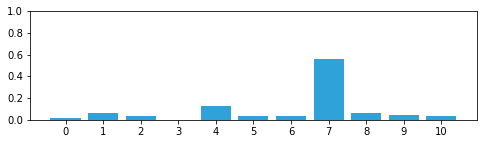

In [39]:
import numpy as np
import lean.kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

每个位置的概率介于 0 和 1 之间，并且所有位置的总和等于 1，因此这使其成为概率分布。每个概率都是离散的，因此我们可以更准确地称之为离散概率分布。在实践中，我们省略了离散和连续这两个术语，除非我们有特殊的理由进行这种区分。

### 3. 随机变量的均值、中位数和众数

给定一组数据，我们通常想知道该集合的代表性或平均值。对此有很多措施，这个概念被称为集中趋势的衡量标准。例如，我们可能想知道班级中学生的平均身高。我们都知道如何找到一组数据的平均值，但让我详细说明这一点，以便我可以引入更正式的符号和术语。平均值的另一个词是平均值。我们通过对值求和并除以值的数量来计算平均值。如果学生的身高（以米为单位）。
$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$
我们计算平均值为：
$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$
使用符号是传统 μ （mu）表示平均值。
我们可以用等式形式化这个计算：
$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$
NumPy提供计算平均值。numpy.mean()

In [40]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

一组数字的模式是最常出现的数字。如果只有一个数字最常出现，我们说它是一个单峰集合，如果两个或多个数字出现的频率相同，那么该集合是多模态的。例如，集合 {1， 2， 2， 2， 3， 4， 4， 4} 具有模式 2 和 4，这是多模态的，集合 {5， 7， 7， 13} 具有模式 7，因此它是单峰的。在本书中，我们不会以这种方式计算模态，但我们确实在更一般的意义上使用了单峰和多模态的概念。例如，在离散贝叶斯一章中，我们谈到了我们对狗的位置作为多模态分布的信念，因为我们为不同的位置分配了不同的概率。

最后，一组数字的中位数是该集合的中点，因此一半的值低于中位数，一半高于中位数。这里，上面和下面与正在排序的集合有关。如果集合包含偶数个值，则两个中间数字平均在一起。

Numpy 提供计算中位数。如您所见，{1.8， 2.0， 1.7， 1.9， 1.6} 的中位数是 1.8，因为 1.8 是排序后该集合的第三个元素。在这种情况下，中位数等于平均值，但这通常不是真的。numpy.median()

In [41]:
np.median(x)

1.8

### 4.随机变量的期望值
随机变量的期望值是如果我们取无限数量的样本，然后将这些样本平均在一起时它的平均值。假设我们有 x=[1，3，5] 并且每个值的概率相等。我们期望x是什么值，平均值？

当然，这将是 1、3 和 5 的平均值，即 3。这应该是有道理的;我们预计会出现相等数量的 1、3 和 5，因此 （1+3+5）/3=3 显然是无限系列样本的平均值。换句话说，这里的期望值是样本空间的平均值。

现在假设每个值都有不同的发生概率。假设 1 有 80% 的几率发生，3 有 15% 的几率，5 只有 5% 的几率。在这种情况下，我们通过概率乘以每个值来计算期望值，并对结果求和。对于这种情况，我们可以计算。
$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

在这里我介绍了符号 𝔼[𝑋] 对于预期值 𝑥 .有些文本使用 𝐸(𝑥) .很明显地，值 1.5 表示 𝑥 更有意义，因为 𝑥 比 3 或 5 更有可能是 1，3 也比 5 更有可能。

我们可以将期望的公式表示为：
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

简单的代数只是表明，如果概率都相等，则期望值与平均值相等
$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

如果 𝑥 是连续的，我们将总和替换为积分，如下所示
$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

𝑓(𝑥) 是 𝑥 概率分布函数。不过我们暂时不会使用这个等式，但我们将在下一章中使用它。

我们可以写一些 Python 来模拟这一点。在这里，我取了 1，000，000 个样本，并计算了我们刚刚通过分析计算的分布的期望值。

In [42]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r < 0.80:
        total += 1
    elif r < 0.95:
        total += 3
    else:
        total += 5
        
total / N

1.500406

您可以看到计算值接近理论的期望值。它不精确，因为获得精确值需要无限的样本量。

#### 练习题 1
投掷骰子的期望值是多少？

#### 求解方法
骰子每一面的可能性相等，因此每一方的概率为 1/6。因此：
$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

#### 练习题 2
给定连续的均匀分布
$$f(x) = \frac{1}{b - a}$$
当  $a=0$ and $b=20$时，求解其期望值？

#### 求解方法

$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### 5.随机变量的方差
上面的计算告诉我们学生的平均身高，但它并没有告诉我们我们可能想知道的一切。例如，假设我们有三类学生，我们将其标记为 𝑋, 𝑌和 𝑍 ，具有以下高度：

In [43]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

使用NumPy，我们看到每个类的平均高度是相同的。

In [44]:
np.mean(X), np.mean(Y), np.mean(Z)

(1.8, 1.8, 1.8)

每个类的平均值为 1.8 米，但请注意，第二类的高度变化比第一类大得多，而第三类根本没有变化。

均值告诉我们一些关于数据的信息，但不是整个完整的信息。我们希望能够确定学生的身高之间有多少差异。你可以想象这有很多原因。也许一个学区需要订购 5，000 张桌子，他们希望确保购买适合学生身高范围的尺寸。

统计学已将测量差异的概念正式化为标准差和方差的概念。计算方差的公式为：
$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

暂时忽略平方项的影响，您可以看到方差是样本空间X变量和均值差值($X-\mu)$的期望值。稍后，我将会解释平方项的意义与目的。

期望值的公式为 $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$， 因此，我们可以将其代入上面的等式中，得到：
$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$

让我们计算这三个类的方差，看看我们得到什么值？并熟悉这个概念。

$X$的均值是 1.8 ($\mu_x = 1.8$) ,因此我们可以计算：
$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy 提供了计算方差的函数：var()

In [45]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


这可能有点难以解释。高度以米为单位，但方差以米平方为单位。因此，我们有一个更常用的度量，标准差，它定义为方差的平方根：

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

这是典型的使用 σ 对于标准差和 σ2 对于差异。在本书的大部分内容中，我将使用 σ2 而不是 VAR(𝑋) 对于方差;它们象征着同一件事。
对于第一类，我们可以计算出它的标准差为：
$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

我们可以使用计算标准偏差的 NumPy 方法来验证此计算。“std”是标准差的常见缩写。numpy.std()

In [46]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


当然， 0.14142=0.02 ，这与我们之前对方差的计算一致.

标准差意味着什么？它告诉我们彼此之间的高度差异有多大。“多大”不是一个数学术语。一旦我们在下一节中介绍高斯的概念，我们将能够更精确地定义它。现在我要说的是，对于许多事情，所有值的 68% 都在平均值的一个标准差内。换句话说，我们可以得出结论，对于随机班级，68% 的学生的身高在 1.66 （1.8-0.1414） 米到 1.94 （1.8+0.1414） 米之间。

我们可以在绘图中查看：

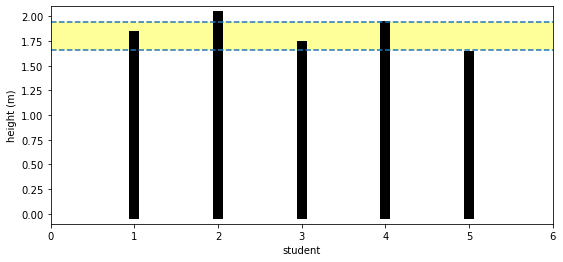

In [47]:
from lean.kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

对于只有 5 名学生，我们显然不会在一个标准差内获得 68%。我们确实看到五分之三的学生在 ±1σ ，或 60%。但是，我们只用了仅仅5个样本就可以这么接近 68 %。那么，让我们看一下有 100 名学生的班级的结果。

> **我们将一个标准差写为 1σ ，发音为“一个标准差”，而不是“一西格玛”。两个标准差为 2σ**

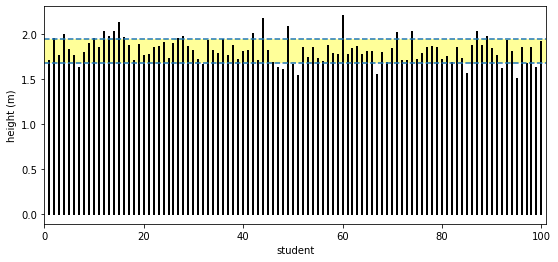

mean = 1.810
std  = 0.134


In [48]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

通过肉眼看，大约68%的高度位于 ±1σ 平均值为 1.8，但我们可以用代码验证这一点。

In [49]:
np.sum((data > mean - std) & (data < mean + std)) / len(data) * 100

72.0

我们将很快对此进行更深入的讨论。现在让我们计算:

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

 $Y$ 的平均值是 $\mu=1.8$ m, 所以

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$
我们将用 NumPy 验证这一点

In [50]:
print(f"std of Y is {np.std(Y):.2f} m")

std of Y is 0.39 m


这符合我们的预期。𝑌的高度变化更大，并且标准差更大。

最后，让我们计算 𝑍， 它的值没有变化，因此我们期望标准差为零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

在我们继续之前，我需要指出，我忽略了平均男性比女性高。一般来说，只包含男性或女性的班级的身高方差将小于男女班级的身高差异。其他因素也是如此。营养良好的儿童比营养不良的儿童高。斯堪的纳维亚人比意大利人高。在设计实验时，统计学家需要考虑这些因素。

我建议我们可以执行此分析来订购学区的书桌。对于每个年龄组，可能有两种不同的平均值 - 一种聚集在女性的平均身高周围，另一种平均值聚集在男性的平均身高周围。整个班级的平均值将介于两者之间。如果我们为所有学生的平均值购买书桌，我们最终可能会得到既不适合学校男性也不适合女性的书桌！

我们不会在本书中考虑这些问题。如果您需要学习处理这些问题的技术，请查阅任何标准概率文本。

### 6.为什么是差异的平方
为什么我们要用差值的平方来计算方差？我可以做很多数学，但让我们用简单的方式看一下。这是绘制的 𝑋 值到其均值的图表，其中 𝑋=[3，−3，3，−3]

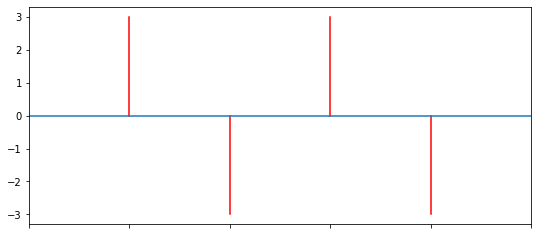

In [51]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='r')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

如果我们不取差异的平方，符号将抵消掉：
$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

这显然是不正确的，因为数据存在差异，其方差应该大于 0。

也许我们可以使用绝对值？我们可以通过检查看到结果是 12/4=3 这当然是正确的 — 每个值与平均值相差 3。但是，如果我们有 𝑌=[6，−2，−3，1] ?在这种情况下，我们得到 12/4=3
。𝑌 显然比 𝑋更分散，但计算产生相同的方差。如果我们使用平方的公式，我们得到Y的方差为 3.5，这可以反映其较大的变化。

这不是正确性的证明。事实上，该技术的发明者卡尔·弗里德里希·高斯（Carl Friedrich Gauss）认识到它有些武断。如果存在异常值，则对差异进行平方会给该项带来不成比例的权重。例如，让我们看看如果我们有：

In [52]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


这是“正确”的吗？你告诉我。如果没有 100 的异常值，我们得到 σ2=2.03，准确地反映了如何 𝑋 在没有异常值的情况下变化。一个异常值淹没了方差计算。我们是想淹没计算，以便我们知道存在异常值，还是稳健地合并异常值，并且仍然提供接近没有异常值的值的估计值？再说一遍，你告诉我。显然，这取决于您的问题。

我不会继续沿着这条路走下去;我不会继续走下去。如果你有兴趣，你可能想看看James Berger在这个问题上所做的工作，在一个叫做贝叶斯鲁棒性的领域，或者Peter J. Huber关于鲁棒统计的优秀出版物[4]。在本书中，我们将始终使用高斯定义的方差和标准差。

从中可以收集的要点是，这些汇总统计数据总是讲述一个关于我们数据的不完整故事。在这个例子中，高斯定义的方差并没有告诉我们有一个大的异常值。但是，它是一个强大的工具，因为我们可以用几个数字简洁地描述一个大型数据集。如果我们有 10 亿个数据点，我们就不会想用肉眼检查绘图或查看数字列表;汇总统计为我们提供了一种以有用的方式描述数据形状的方法。

## 三、高斯

我们现在准备了解高斯。让我们提醒自己这一章的动机。
> 我们想要一种单模态的、连续的方式来表示概率，以模拟现实世界的运作方式，并且计算起来是有效的。

让我们看一个高斯分布图，以了解我们在说什么。

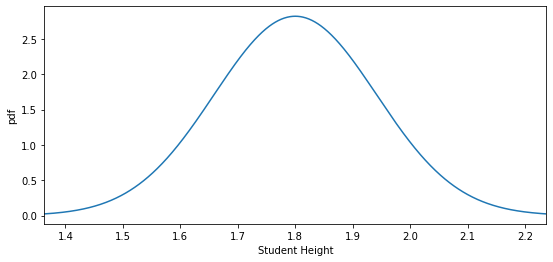

In [53]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

此曲线是[*概率密度函数*](https://en.wikipedia.org/wiki/Probability_density_function)或简称 pdf。它显示了随机变量取值的相对可能性。我们可以从图表中看出，学生的身高接近 1.8 m 的可能性比 1.7 m 的可能性大，并且更有可能的身高为 1.9 m 相比于 1.4 m。换句话说，许多学生的身高接近1.8米，很少有学生的身高在1.4米或2.2米。最后，请注意曲线以平均值 1.8 m 为中心。

> 我在Supporting_Notebooks文件夹的笔记本Computing_and_Plotting_PDFs中解释了如何绘制高斯图等等 。你可以在[*这里*](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb)在线阅读[1]。


您可能将其识别为“钟形曲线”。这条曲线无处不在，因为在现实世界的条件下，许多观测值都是以这种方式分布的。我不会使用术语“钟形曲线”来指代高斯曲线，因为许多概率分布具有相似的钟形曲线形状。非数学来源可能不那么精确，所以当你看到没有定义的术语时，要谨慎地得出结论。

这条曲线并非高度所独有——大量的自然现象都表现出这种分布，包括我们在滤波问题中使用的传感器。正如我们将看到的，它还具有我们正在寻找的所有属性——它表示单峰信念或值作为概率，它是连续的，并且计算效率高。我们很快就会发现，它还具有其他我们可能没有意识到我们想要的令人向往的品质。

为了进一步激励您，请回想一下离散贝叶斯一章中概率分布的形状：

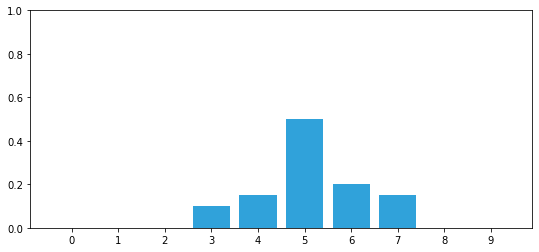

In [54]:
from lean.kf_book import book_plots as book_plots

belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

它们不是完美的高斯曲线，但它们是相似的。我们将使用高斯来替换该章中使用的离散概率！

### 1.术语
在我们继续之前，先介绍一下术语 - 此图表描述了随机变量的概率密度，其值介于 （ −∞..∞） .那是什么意思？想象一下，我们对一段高速公路上的汽车速度进行无限精确的测量。然后，我们可以通过显示以任何给定速度经过的汽车的相对数量来绘制结果。如果平均值为 120 公里/小时，它可能如下所示：

<AxesSubplot:xlabel='speed(kph)'>

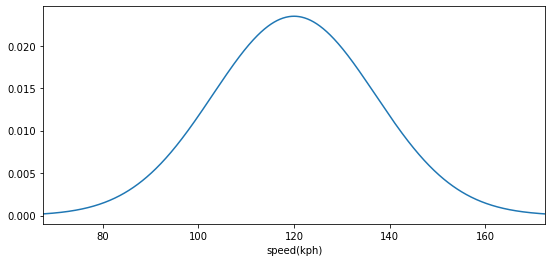

In [55]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)')

y 轴描绘了概率密度——以相应 x 轴上速度行驶的汽车的相对数量。我将在下一节中进一步解释这一点。

高斯模型是不完美的。虽然这些图表没有显示它，但分布的尾部延伸到无穷大。尾部是曲线的远端，其值最低。当然，人的身高或汽车速度不能小于零，更不用说$-\infty$或$\infty$了。“The map is not the territory”是一个常见的表达方式，对于贝叶斯过滤和统计也是如此。上面的高斯分布模拟了测量的汽车速度的分布，但作为一个模型，它必然是不完美的。模型和现实之间的差异将在这些过滤器中一次又一次地出现。高斯用于数学的许多分支，不是因为它们完美地模拟了现实，而是因为它们比任何其他相对准确的选择都更容易使用。然而，即使在本书中，高斯也无法模拟现实，迫使我们使用计算昂贵的替代方案。

您将听到这些分布称为高斯分布或正态分布。在这种情况下，高斯和正态的含义相同，并且可以互换使用。我将在本书中使用这两个术语，因为不同的来源会使用任何一个术语，我希望你习惯于同时看到这两个术语。最后，与本段一样，通常缩短名称并谈论高斯或正态分布 — 这两者都是高斯分布的典型快捷名称。

### 2.高斯分布

让我们探讨一下高斯是如何工作的。高斯是一个连续概率分布，完全用两个参数描述，均值（$\mu$）和方差（$\sigma^2$）。它被定义为：
$$ f（x， \mu， \sigma） = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{（x-\mu）^2}{2\sigma^2} }\big ] $$

$\exp[x]$ 是 $e^x$ 的表示法。

如果您以前没有见过这个等式，请不要被它吓着;您无需记住或操纵它。该函数的计算存储在“stats.py”中，函数为“gaussian（x， mean， var， normed=True）”。

去掉常量，你可以看到它是一个简单的指数：

$$f（x）\propto e^{-x^2}$$

具有熟悉的钟形曲线形状

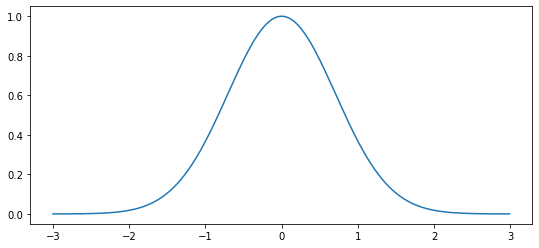

In [56]:
x = np.arange(-3, 3, 0.01)
plt.plot(x, np.exp(-x**2))

让我们提醒自己如何查看函数的代码。在单元格中，键入函数名称，后跟两个问号，然后按 Ctrl+Enter。这将打开一个弹出窗口，显示源。取消注释下一个单元格并立即尝试。

In [57]:
from filterpy.stats import gaussian
# gaussian??

让我们绘制一个均值为 22 $（\mu=22）$，方差为 4 $（\sigma^2=4）$ 的高斯。

<AxesSubplot:xlabel='$^{\\circ}C$'>

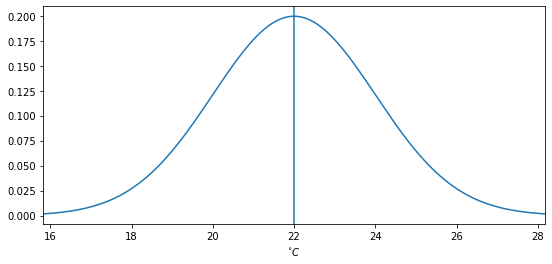

In [58]:
plot_gaussian_pdf(mean=22, variance=4, mean_line=True, xlabel='$^{\circ}C$')

这条曲线是什么意思？假设我们有一个读数为 22°C 的温度计。 没有温度计是完全准确的，因此我们预计每个读数都会略微偏离实际值。然而，一个称为[中心极限定理的定理](https://en.wikipedia.org/wiki/Central_limit_theorem)指出，如果我们进行多次测量，则测量值将是正态分布的。当我们查看此图表时，我们可以看到它与温度计在实际温度为 22°C 的情况下读取特定值的概率成正比。

回想一下，高斯分布是连续的。想想一条无限长的直线 - 你随机选择的点在 2 处的概率是多少。显然是0%，因为有无限数量的选择可供选择。正态分布也是如此;在上图中，正好是2°C的概率为0%，因为读数可以取无限数量的值。

这条曲线是什么？这就是我们所说的概率密度函数。曲线下任何区域的面积都会给出这些值的概率。因此，例如，如果您计算曲线下的面积在 20 和 22 之间，则结果面积将是温度读数介于这两个温度之间的概率。

这里另一种理解它的方法。岩石或海绵的密度是多少？它是在给定空间中压实多少质量的量度。岩石很密集，海绵更少。所以，如果你想知道一块石头有多重但没有秤，你可以把它的体积乘以它的密度。这会给你它的质量。实际上，大多数物体的密度各不相同，因此您需要对岩石体积的局部密度进行积分。

$$M = \iiint_R p(x,y,z)\, dV$$

我们对概率密度做同样的事情。如果你想知道温度在 20°C 到 21°C 之间，你可以将上面的曲线从 20 到 21 积分。如您所知，曲线的积分为您提供曲线下方的面积。由于这是概率密度的曲线，因此密度的积分是概率。

温度正好是 22°C 的概率是多少？直观地说，0.这些是实数，22°C与22.000000000000017°C的几率是无穷小的。从数学上讲，如果我们从 22 积分到 22，我们会得到什么？零。

回想一下岩石，岩石上一个点的重量是多少？无穷小的点必须没有重量。询问单个点的重量是没有意义的，询问具有单个值的连续分布的概率也没有意义。两者的答案显然都是零。

实际上，我们的传感器没有无限的精度，因此读数为22°C意味着一个范围，例如22 $\pm$ 0.1°C，我们可以通过从21.9到22.1进行积分来计算该范围的概率。

我们可以用贝叶斯术语或频率主义术语来思考这一点。作为贝叶斯，如果温度计的读数正好是22°C，那么我们的信念可以用曲线来描述——我们相信实际（系统）温度接近22°C是非常高的，而我们认为实际温度接近18的信念非常低。作为一个频率主义者，我们会说，如果我们在22°C的温度下对一个系统进行10亿次温度测量，那么测量的直方图将看起来像这条曲线。

如何计算概率或曲线下的面积？你积分高斯方程

$$ \int^{x_1}_{x_0} \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{（x-\mu）^2}/\sigma^2 } dx$$

这称为累积概率分布，通常缩写为 cdf。

我为你写了计算积分。例如，我们可以计算filterpy.stats.norm_cdf

In [59]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


平均值（$\mu$）它听起来的样子是 - 所有可能性的平均值。由于曲线的对称形状，它也是曲线的最高部分。温度计读数为22°C，因此，这就是我们它做平均值的原因。

随机变量 $X$ 的正态分布的表示法是 $X \sim\ \mathcal{N}（\mu，\sigma^2）$，其中 $\sim$ 表示服从分布。这意味着我可以将温度计的温度读数表示为

$$\text{temp} \sim \mathcal{N}（22，4）$$

这是一个极其重要的结果。高斯允许我只用两个数字捕获无限数量的可能值！使用值 $\mu=22$ 和 $\sigma^2=4$，我可以计算任何范围内的测量分布。

一些来源使用 $\mathcal N （\mu， \sigma）$ 而不是 $\mathcal N （\mu， \sigma^2）$。两者都很好，它们都是约定。如果您看到诸如 $\mathcal{N}（22，4）$ 之类的术语，您需要记住正在使用哪种形式。在这本书中，我总是使用 $\mathcal N （\mu， \sigma^2）$，所以 $\sigma=2$， $\sigma^2=4$ 作为这个例子。

### 3.方差与信念

由于这是一个概率密度分布，因此要求曲线下的面积始终等于 1。这应该直观清晰——曲线下的面积代表所有可能的结果，发生了一些事情，而一些事发生的概率是1，所以密度必须加起来为1。我们自己可以用一些代码来证明这一点。（如果你有数学倾向，可以将高斯方程从$-\infty$积分到$\infty$）

In [60]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


这导致了一个重要的见解。如果方差很小，则曲线将变窄。这是因为方差是样本与均值变化程度的度量。要保持面积等于 1，曲线也必须很高。另一方面，如果方差很大，则曲线会很宽，因此它也必须很短才能使面积等于 1。

让我们以图形方式看一下。我们将使用上述可以采用单个值或值数组的方法。filterpy.stats.gaussian

In [61]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


默认情况下，对输出进行归一化，这会将输出转换回概率分布。使用参数来控制这一点。gaussiannormed

In [62]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


如果高斯没有归一化，则称为高斯函数而不是高斯分布。

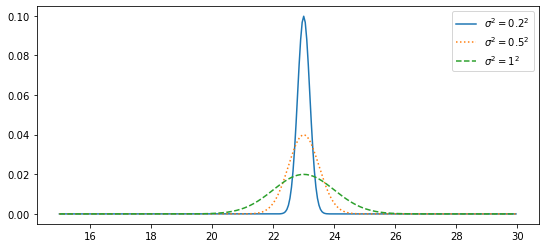

In [63]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

这告诉我们什么？$\sigma^2=0.2^2$ 的高斯非常窄。这是说我们相信$x=23$，并且我们对此非常确定：在$\pm 0.2$标准范围内。相比之下，$\sigma^2=1^2$ 的高斯也认为 $x=23$，但我们对此不太确定。我们认为 $x=23$ 较低，因此我们对 $x$ 可能可能值的信念是分散的——例如，我们认为 $x=20$ 或 $x=26$ 很可能。$\sigma^2=0.2^2$ 几乎完全消除了 $22$ 或 $24$ 作为可能的值，而 $\sigma^2=1^2$ 认为它们几乎与 $23$ 一样可能。

如果我们回想一下温度计，我们可以将这三条曲线视为代表三个不同温度计的读数。$\sigma^2=0.2^2$ 的曲线表示非常精确的温度计，$\sigma^2=1^2$ 的曲线表示相当不准确的温度计。请注意高斯分布为我们提供的非常强大的性质 - 我们可以完全表示温度计的读数和误差，只有两个数字 - 平均值和方差。

高斯的等价形式是 $\mathcal{N}（\mu，1/\tau）$，其中 $\mu$ 是平均值，$\tau$ 是精度。$1/\tau = \sigma^2$;它是方差的倒数。虽然我们在本书中没有使用这个公式，但它强调了方差是衡量我们数据精确程度的指标。小方差产生大精度 — 我们的测量非常精确。相反，大方差产生低精度——我们的信念分散在大范围内。你应该习惯于以这些等价形式思考高斯。在贝叶斯术语中，高斯反映了我们对测量的 信念 ，它们表示测量的，并表示测量中存在多少方差。这些都是陈述同一事实的不同方式。

我正在超越自己，但在下一章中，我们将使用高斯来表达我们对诸如我们正在跟踪的物体的估计位置或我们正在使用的传感器的准确性之类的信念。

### 4.$3 \sigma$原则

现在值得花几句话来讨论标准差。标准差是数据偏离平均值程度的度量。对于高斯分布，68% 的数据落在平均值的一个标准差 （$\pm1\sigma$） 内，95% 落在两个标准差 （$\pm2\sigma$） 内，99.7% 落在三个标准差 （$\pm3\sigma$） 内。这通常称为 68-95-99.7 规则。如果您被告知班级的平均考试分数为 71，标准差为 9.4，则可以得出结论，如果分布呈正态（即使用 $71 \pm （2 * 9.4）$ 计算），则可以得出结论，95% 的学生的分数介于 52.2 和 89.8 之间。

最后，这些不是任意数字。如果我们位置的高斯是 $\mu=22$ 米，那么标准差也有单位米。因此，$\sigma=0.2$ 意味着 68% 的测量范围在 21.8 到 22.2 米之间。方差是标准差的平方，因此 $\sigma^2 = .04$ 米$^2$。正如您在上一节中看到的，编写 $\sigma^2 = 0.2^2$ 可以使这更有意义，因为 0.2 与数据处于相同的单位中。

下图描述了标准差与正态分布之间的关系。

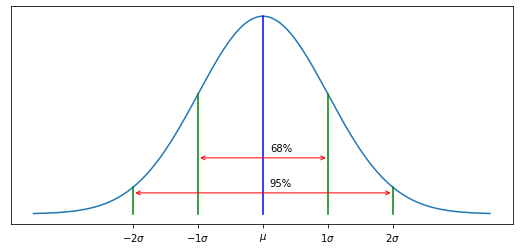

In [64]:
from lean.kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

### 5.交互式高斯

对于那些在Jupyter笔记本中阅读本文的人，这里是高斯图的交互式版本。使用滑块修改 $\mu$ 和 $\sigma^2$。调整 $\mu$ 将使图形向左和向右移动，因为您正在调整平均值，而调整 $\sigma^2$ 将使钟形曲线更粗更细。

In [65]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

最后，如果你在网上阅读这篇文章，这里有一个高斯的动画。首先，均值向右移动。然后均值以 $\mu=5$ 为中心并修改方差。

### 6.高斯的计算性质

离散贝叶斯滤波器的工作原理是乘以和加上任意概率分布。卡尔曼滤波器使用高斯而不是任意分布，但算法的其余部分保持不变。这意味着我们需要乘以和加上高斯分布。

高斯的一个显着性质是两个独立高斯分布（https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables）的和也是正态分布的！乘积不是高斯的，而是与高斯成正比的。在这里，我们可以说乘以两个高斯分布的结果是一个高斯函数（在这种情况下，召回函数意味着不能保证值总和为 1 的属性）。

在我们进行数学计算之前，让我们直观地测试一下。

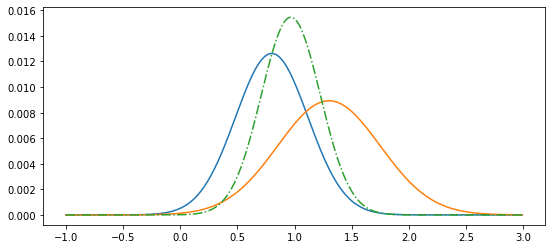

In [66]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

在这里，我创建了两个高斯，g1=$\mathcal N（0.8， 0.1）$ 和 g2=$\mathcal N（1.3， 0.2）$ 并绘制了它们。然后我将它们相乘并规范化结果。如您所见，结果看起来像高斯分布。

高斯是非线性函数。通常，如果将非线性方程相乘，则最终会得到不同类型的函数。例如，两个sin函数相乘与sin(x)函数有很大的不同。


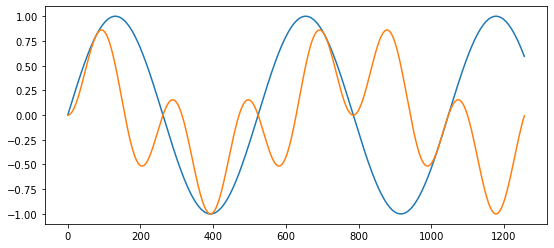

In [67]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

但是两个高斯分布相乘的结果是高斯函数。这是卡尔曼滤波器在计算上可行的关键原因。换句话说，卡尔曼滤波器使用高斯滤波器，因为它们在计算上很好。

两个独立高斯的乘积由下式给出：

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\ \sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} \end{aligned}$$

两个高斯量之和由下式给出
$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$
 
在本章的最后，我推导出这些方程。但是，了解推导并不是很重要。

### 7.将一切整合在一起

现在我们准备讨论如何在滤波中使用高斯量。在下一章中，我们将使用高斯实现滤波器。在这里，我将解释为什么我们要使用高斯。

在上一章中，我们用数组表示概率分布。我们通过计算该分布的元素乘积来执行更新计算，另一个分布表示每个点的测量可能性，如下所示：

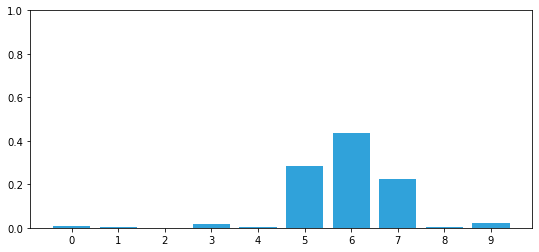

In [68]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

换句话说，我们必须计算 10 次乘法才能得到这个结果。对于具有多个维度的大型数组的真实过滤器，我们需要数十亿次乘法和大量内存。

但这种分布看起来像高斯分布。如果我们使用高斯而不是数组呢？我将计算后验的均值和方差，并将其与条形图进行绘制。

mean: 5.88 var: 1.24


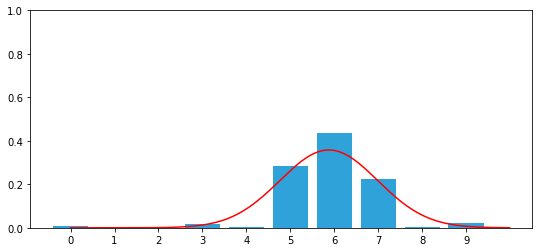

In [69]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

这令人印象深刻。我们可以用两个数字来描述整个数字分布。也许这个例子没有说服力，因为分布中只有 10 个数字。但是一个真正的问题可能有数百万个数字，但仍然只需要两个数字来描述它。

接下来，回想一下，我们的过滤器实现了更新函数

```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

如果数组包含一百万个元素，那就是一百万个乘法。但是，如果我们用高斯替换数组，那么我们将用

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$
 
这是三个乘法和两个除法。

## 四、贝叶斯定理

在上一章中，我们通过推理我们每刻的信息开发了一种算法，我们将其表示为离散概率分布。在这个过程中，我们发现了贝叶斯定理。贝叶斯定理告诉我们如何计算给定先验信息的事件的概率。

通过下面的概率计算公式，我们实现了这个函数：update()

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$

事实证明，这就是贝叶斯定理。一会儿，我将进行数学推导，但在许多方面，这掩盖了这个等式中表达的简单想法。我们将其解读为：

$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

这里 $\| \cdot\|$ 表示规范化术语.

我们带着一个简单的推理来解决这个问题，关于一只狗走在走廊上。然而，正如我们将看到的，同样的等式适用于所有的滤波问题。我们将在随后的每一章中使用此等式。

回顾一下，先验是在我们包括测量概率（可能性）之前发生某事的概率，后验是我们在合并测量信息后计算的概率。

贝叶斯定理是：

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$ 被叫做 [*条件概率*](https://en.wikipedia.org/wiki/Conditional_probability). 也就是说，它表示 B发生条件下，A发生的概率。例如，如果昨天下雨，那么与典型的一天相比，今天更有可能下雨，因为降雨系统通常持续一天以上。假设昨天下雨，我们会把今天下雨的概率写成 𝑃（今天下雨∣昨天下雨）。

我掩盖了一个重要的观点。在上面的代码中，我们处理的不是单个概率，而是概率数组 - 概率分布。我刚刚给出的贝叶斯方程使用概率，而不是概率分布。但是，它与概率分布同样有效。我们使用小写的 𝑝 进行概率分布。

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$

在上面的等式中， 𝐵是依据（测量）， p（A）是先验的， p（B∣A）是可能性 ， p（A∣B）后验的。通过将数学术语替换为相应的单词，您可以看到贝叶斯定理与我们的更新方程匹配。让我们根据我们的问题重写等式。 我们将会使用$x_i$ 表示 *i*时刻位置, and $z$ 表示测量的位置. 因此, 我们想知道 $P(x_i \mid z)$, 因此, 在测量值 $z$ 的情况下，狗处于 $x_i$ 位置的概率。 

所以，让我们把它代入方程并求解它。

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

这看起来很不优雅，但实际上很简单。让我们弄清楚右边的每个术语是什么意思。首先是，$p(z \mid x_i)$，表示 *可能性（likelihood）*，或者说是在每个单元格位置 $x_i$处进行测量的可能性和概率。$p(x_i)$ 表示 *先验（prior）*，为测量之前我们的信念。我们把它们乘在一起，恰恰是update函数中没有规范化的乘法。

```python
def update(likelihood, prior):
    posterior = prior * likelihood   # p(z|x) * p(x)
    return normalize(posterior)
```

要考虑的最后一个项是分母$p(z)$。这是在不考虑位置的情况下获得测量值 $z$ 的概率。它通常被叫做 *证据*。我们通过取 𝑥 的总和（sum(belief)）或在代码中计算出来。这就是我们计算归一化的方式！因此，update()函数只不过是计算贝叶斯定理。

文献经常以积分的形式给你这些方程。毕竟，积分只是连续函数上的和。所以，你可能会看到贝叶斯定理写成

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{\int p(B \mid A_j) p(A_j) \,\, \mathtt{d}A_j}\cdot$$

这个分母通常无法通过分析求解;当它可以解决时，数学是非常困难的。皇家统计学会最近的一篇评论文章称其为“狗的早餐” [8]。采用贝叶斯方法的过滤教科书充满了没有解析解的积分方程。不要被这些方程吓倒，因为我们通过规范化我们的后验来处理这个积分。我们将在粒子过滤器一章中学习更多处理此问题的技术。在那之前，要认识到在实践中，它只是一个我们可以求和的规范化项。我想说的是，当你面对一页积分时，只要把它们想象成总和，并将它们与这一章联系起来，困难往往会消失。问问自己“我们为什么要将这些值相加”，以及“为什么我用这个词除法”。令人惊讶的是，答案往往是显而易见的。令人惊讶的是，作者经常忽略提及这种解释。

贝叶斯定理的强大很可能你还不清楚。我们要计算 $p(x_i \mid Z)$。也就是说，在步骤i中，给定测量值的可能状态是什么。总的来说，这是一个非常困难的问题。贝叶斯定理是通用的。根据癌症检测的结果，我们可能想知道我们患癌症的概率，或者给定各种传感器读数，我们想知道下雨的概率。这样说，问题似乎无法解决。

但是贝叶斯定理允许我们使用逆 $p(Z\mid x_i)$来计算它，这通常很容易计算。

$$p(x_i \mid Z) \propto p(Z\mid x_i)\, p(x_i)$$

也就是说，要计算给定特定传感器读数下雨的可能性，我们只需要计算下雨情况下，给定传感器读数的可能性！这是一个容易得多的问题！好吧，天气预报仍然是一个难题，但贝叶斯使它变得容易处理。

同样，正如您在离散贝叶斯章节中看到的那样，我们通过计算西蒙在走廊的任何位置给定传感器部分的可能性，来计算传感器读数给定情况下，西蒙处于位置的可能性。一个难题变得容易。

## 五、全概率定理

我们现在知道了update函数背后的数学公式。predict函数是什么？predict函数的实现通过全概率公式。让我们回想一下predict的计算内容，它根据所有可能的运动事件的概率，计算出在任何给定位置的概率。让我们将其表示为一个等式。在任何时间 $t$，任何位置 $i$ 的概率被写作$P(X_i^t)$。我们计算$t-1$时刻的先验乘以从$x_j$ 到 $x_i$运动概率的和。那是

$$P(X_i^t) = \sum_j P(X_j^{t-1})  P(x_i | x_j)$$

这个方程被称为全概率定理。引用维基百科[6]“它表达了可以通过几个不同事件实现的结果的总概率”。我本可以给你这个方程并实现，但你理解为什么方程工作的机会很小。提醒一下，这里是计算此等式的代码predict()

```python
for i in range(N):
    for k in range (kN):
        index = (i + (width-k) - offset) % N
        result[i] += prob_dist[index] * kernel[k]
```

### 1.使用 scipy.stats 计算概率

在本章中，我使用了[FilterPy](https://github.com/rlabbe/filterpy)中的代码来计算和绘制高斯。我这样做是为了让您有机会查看代码并了解如何实现这些功能。但是，Python带有相关模块，并且在模块中带有广泛的统计功能。因此，让我们来看看如何使用scipy.stats来计算统计数据和概率。scipy.stats。

scipy.stats模块包含许多对象，您可以使用这些对象来计算各种概率分布的属性。[此模块的完整文档如下：](http://docs.scipy.org/doc/scipy/reference/stats.html)。我们将专注于实现正态分布的归一化变量。让我们看一些用于计算高斯的代码statsscipy.stats.norm，并将其高斯值与函数从 FilterPy 返回的值进行比较。

In [70]:
from scipy.stats import norm
import filterpy.stats

# 高斯分布，某个值处的概率密度
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


该norm(2, 3)调用创建 scipy 所谓的“冻结”分布 - 它创建并返回一个均值为 2、标准差为 3 的对象。然后，您可以多次使用此对象来获取各种值的概率密度，如下所示：

In [71]:
n23 = norm(2, 3)
print('pdf of 1.5 is       %.4f' % n23.pdf(1.5))
print('pdf of 2.5 is also  %.4f' % n23.pdf(2.5))
print('pdf of 2 is         %.4f' % n23.pdf(2))

pdf of 1.5 is       0.1311
pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


scipy.stats.norm[2] 的文档列出了许多其他函数。例如，我们可以使用rvs()函数从分布中生成 𝑛 个样本。

In [72]:
np.set_printoptions(precision=3, linewidth=50)
print(n23.rvs(size=15))

[-1.114  4.529  2.652  3.526 -1.046  1.279 -0.462
  0.91   1.823  4.318 -0.752  1.573  0.28   1.754
  1.116]


我们可以得到[累积分布函数CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function)，它是从分布中随机抽取的值小于或等于 $x$ 的概率。

In [73]:
# probability that a random value is less than the mean 2
print(n23.cdf(2))

0.5


我们可以得到分布的各种属性：

In [74]:
print('variance is', n23.var())
print('standard deviation is', n23.std())
print('mean is', n23.mean())

variance is 9.0
standard deviation is 3.0
mean is 2.0


### 2.使用高斯对世界进行建模的局限性

前面我提到了中心极限定理，它指出，在某些条件下,无论随机变量如何分布，任何独立随机变量的算术和都将呈正态分布。这对我们来说很重要，因为自然界充满了非正态的分布，但是当我们在大量种群上应用中心极限定理时，我们最终会得到正态分布。

但是，证明的关键部分是“在某些条件下”。这些条件不适用于物理世界。例如，厨房秤的读数不能低于零，但如果我们将测量误差表示为高斯，则曲线的左侧延伸到负无穷大，这意味着给出负读数的可能性非常小。

这是一个广泛的话题，我将不详尽地讨论。

让我们考虑一个微不足道的例子。我们认为考试成绩之类的东西是正态分布的。如果你曾经有过专业的“成绩曲线”，你就反对于这个假设。但当然，考试成绩不能服从正态分布。这是因为分布为任何值分配非零概率分布，无论与平均值有多远。例如，假设您的平均值为 90，标准差为 13。正态分布假设某人获得 90 的几率很大，而某人获得 40 的几率很小。然而，这也意味着某人获得-10或150的成绩的可能性很小。它分配获得 $-10^{300}$ 或者 $10^{32986}$.分数的极小机会。高斯分布的尾是无限长的。


但是，为了测试我们知道的是不正确的。忽略额外的信息，你不能获得小于 0 或超过 100 的积分。让我们使用正态分布绘制此值范围，看看这表示实际测试分数分布的差坏程度。

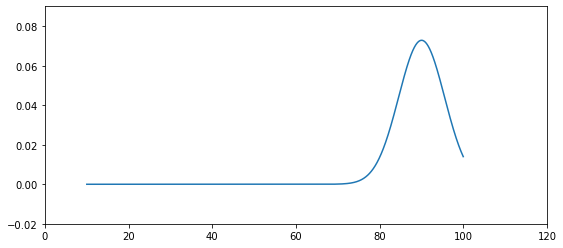

In [75]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);

曲线下的面积不能等于 1，因此它不是概率分布。实际发生的情况是，比正态分布预测的学生更多的分数接近范围的上限（例如），并且尾巴变得“胖”。此外，该测试可能无法完全区分学生技能的微小差异，因此平均值左侧的分布也可能在某些地方有点堆积。

传感器测量世界。传感器测量中的误差很少是真正的高斯误差。现在谈论这给卡尔曼滤波器设计人员带来的困难还为时过早。值得记住的是，卡尔曼滤波数学是基于世界的理想化模型。现在，我将介绍一些代码，我将在本书的后面使用它们来形成分布，以模拟各种过程和传感器。此分布称为学生的 [𝑡-分布](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

假设我想对输出中有一些白噪声的传感器进行建模。为简单起见，假设信号是常数 10，噪声的标准差为 2。我们可以使用该numpy.random.randn()函数来获取平均值为 0、标准差为 1 的随机数。我可以用以下方法模拟：


In [76]:
from numpy.random import randn
def sense():
    return 10 + randn()*2

让我们绘制该信号，看看它是什么样子的。

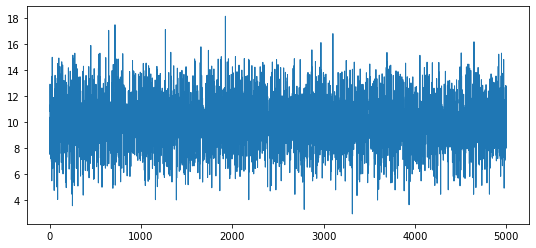

In [77]:
zs = [sense() for i in range(5000)]
plt.plot(zs, lw=1);

这看起来就像我所期望的。信号以 10 为中心。标准偏差为 2 意味着 68% 的测量值将在 $\pm$ 2 个中的 10 个，99% 将在 $\pm$ 6 中的 10，这看起来像正在发生的事情。

现在让我们看一下使用学生的 $t$-分布。我不会深入数学，只是给你它的源代码，然后使用它绘制一个分布。

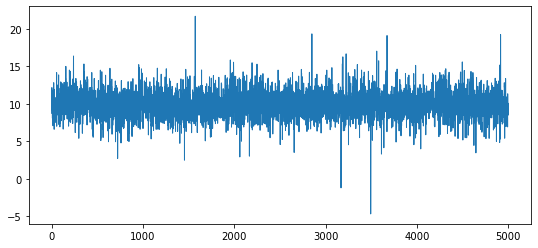

In [78]:
import random
import math

def rand_student_t(df, mu=0, std=1):
    """return random number distributed by Student's t 
    distribution with `df` degrees of freedom with the 
    specified mean and standard deviation.
    """
    x = random.gauss(0, std)
    y = 2.0*random.gammavariate(0.5*df, 2.0)
    return x / (math.sqrt(y / df)) + mu

def sense_t():
    return 10 + rand_student_t(7)*2

zs = [sense_t() for i in range(5000)]
plt.plot(zs, lw=1);

我们可以从图中看到，虽然输出与正态分布相似，但有些异常值与平均值的偏差远远超过 3 个标准差。

学生分布- 𝑡分布不太可能是传感器（例如，GPS或多普勒）性能的准确模型，这不是一本关于如何对物理系统进行建模的书。但是，它确实会产生合理的数据来测试滤波器在出现真实世界噪声时的性能。我们将在本书的其余部分的模拟和测试中使用这样的分布。

这不是一个无用的问题。卡尔曼滤波方程假设噪声呈正态分布，如果不是这样，则表现为次优。关键任务滤波器（例如航天器上的滤波器）的设计人员需要掌握有关航天器上传感器性能的大量理论和经验知识。例如，我在NASA任务中看到的演示文稿指出，虽然理论上他们应该使用3个标准差来区分噪声和有效测量，但在实践中他们必须使用5到6个标准差。这是他们通过实验确定的。

rand_student_t 的代码包含在filterpy.stats中。您可以使用它

```python
from filterpy.stats import rand_student_t
```

虽然我不会在这里介绍它，但统计学已经定义了描述概率分布形状的方法，即它如何与指数分布变化。正态分布围绕均值对称形成 - 如钟形曲线。但是，概率分布在均值周围可能是不对称的。对此的度量称为偏斜。尾巴可以缩短、变胖、变细，或者以不同于指数分布的方式形成。这种测量称为峰度。scipy.stats模块包含计算这些统计数据等的函数describe。

In [79]:
import scipy
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(-4.669008197796648, 21.696436441527723), mean=9.984976711320842, variance=2.8946361830843084, skewness=-0.03576392457905689, kurtosis=2.9635178295233047)

让我们检查两个正常群体，一个小，一个大：

In [80]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-1.4045430408185609, 1.649262533852415), mean=0.4475855517433344, variance=0.7459057879317347, skewness=-0.834828846961191, kurtosis=0.28119941023600203)

DescribeResult(nobs=300000, minmax=(-4.702212753016979, 5.010163890426105), mean=-0.001597245837484587, variance=1.0024249303962296, skewness=0.0027669502655541644, kurtosis=-0.0055573025139756815)


小样本具有非常非零的偏斜和峰度，因为少量样本在 0 的均值周围分布不佳。您也可以通过将计算的均值和方差与理论均值 0 和方差 1 进行比较来了解这一点。相比之下，大样本的均值和方差非常接近理论值，偏斜和峰度都接近于零。

## 六、高斯之和


## 七、高斯乘积